## **필요한 라이브러리 가져오기**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False

#### **관련 Util함수 정의**
※ Refernce sites <br>
  https://towardsdatascience.com/a-practical-guide-to-linear-regression-3b1cb9e501a6 <br>
  https://teddylee777.github.io/scikit-learn/scikit-learn-linear-with-regularizations <br>
  https://medium.com/analytics-vidhya/understanding-the-linear-regression-808c1f6941c0 <br>
  https://medium.datadriveninvestor.com/basics-of-linear-regression-9b529aeaa0a5

In [2]:
my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# 예측 값과 실제 값을 시각적으로 비교하는 산점도를 그리는 함수
def plot_predictions(name_, pred, actual):

    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()


# 새로운 모델의 예측 값과 실제 값을 받아 MSE를 계산하고 이를 my_predictions 딕셔너리에 추가하는 함수
def add_model(name_, pred, actual):

    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse


# 현재 my_predictions 딕셔너리에 저장된 모든 모델의 MSE 값을 바탕으로 시각화하는 함수
def plot_all():

    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()


# 피처 중요도(또는 회귀 계수)를 바탕으로 가로형 막대 그래프를 그리는 함수 
def plot_coef(columns, coef):

    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [3]:
my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# 예측 값과 실제 값을 시각적으로 비교하는 산점도를 그리는 함수
def plot_predictions2(name_, pred, actual):

    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()


# 새로운 모델의 예측 값과 실제 값을 받아 MSE를 계산하고 이를 my_predictions 딕셔너리에 추가하는 함수
def add_model2(name_, pred, actual):

    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse


# 현재 my_predictions 딕셔너리에 저장된 모든 모델의 MSE 값을 바탕으로 시각화하는 함수
def plot_all2():

    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions2(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()



# <img src="../images/emergency.png" width="40" height="40"> **코드 실습 시간 - 다중 선형 회귀 분석** 

### **1) 데이터 불러오기**

In [ ]:
# Boston Housing 데이터 로드 및 일부 데이터 확인

data_test = pd.read_csv('../data/Boston_Housing.csv')  
# Boston_Housing.csv 파일을 Pandas DataFrame으로 불러옴

print("\n데이터 셋의 일부를 확인해보면 아래와 같습니다.")  
# 데이터셋의 상위 몇 개 행을 확인하기 위해 출력
data_test.head()  # 데이터프레임의 상위 5개 행 출력


데이터 셋의 일부를 확인해보면 아래와 같습니다.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<html>
    <b><font size=4>* 변수에 대한 설명</font></b><br><br>
- CRIM: 범죄율<br>
- ZN: 25,000 평방 피트 당 주거용 토지의 비율<br>
- INDUS: 비소매(non-retail) 비즈니스 면적 비율<br>
- CHAS: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)<br>
- NOX: 산화 질소 농도 (천만 분의 1)<br>
- RM:주거 당 평균 객실 수<br>
- AGE: 1940 년 이전에 건축된 자가 소유 점유 비율<br>
- DIS: 5 개의 보스턴 고용 센터까지의 가중 거리<br>
- RAD: 고속도로 접근성 지수<br>
- TAX: 10,000 달러 당 전체 가치 재산 세율<br>
- PTRATIO 도시 별 학생-교사 비율<br>
- B: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.<br>
- LSTAT: 인구의 낮은 지위<br>
- target: 자가 주택의 중앙값 (1,000 달러 단위)<br>
</html>

### **2) 데이터 전처리**
- 데이터 결측치 확인

In [ ]:
# 데이터 결측치를 확인하는 코드를 작성해주세요.

# 각 열에 대해 결측치(null 값)의 개수를 계산하고 출력
data_test.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- 데이터 중복 확인

In [ ]:
# 데이터의 중복을 확인하는 코드를 작성해주세요.

# 데이터프레임에서 중복된 행의 개수를 계산하고 출력
data_test.duplicated().sum()

np.int64(0)

- 중복 데이터를 제거

In [ ]:
# 중복 데이터가 있다면 중복 데이터를 제거하는 코드를 작성해주세요.

# 원본 데이터를 유지하기 위해 데이터프레임 복사
data_test=data_test.copy()

# 데이터프레임에서 중복된 행 제거
# subset=None: 모든 열을 기준으로 중복 여부를 확인
# inplace=True: 원본 데이터프레임(data_test)을 직접 수정
data_test.drop_duplicates(subset=None,inplace=True)

### **3) 데이터 분리**

In [ ]:
# 독립 변수(X)와 종속 변수(y) 정의

X_test = data_test.drop('MEDV', axis=1)  
# 독립 변수: 'MEDV' 열을 제외한 나머지 열 사용

y_test = data_test['MEDV']  
# 종속 변수: 'MEDV' 열 사용 (예측 대상)

# 데이터를 학습 데이터와 테스트 데이터로 분리 (80:20 비율)
X_train, X_test, y_train, y_test = train_test_split(
    X_test, y_test, test_size=0.2, random_state=0
)
# test_size=0.2: 데이터의 20%를 테스트 세트로 사용
# random_state=0: 결과 재현성을 위한 랜덤 시드 설정

# 데이터 분리 후 크기 출력
print("\n학습 세트 크기:", X_train.shape[0])  # 학습 세트의 샘플 개수 출력
print("테스트 세트 크기:", X_test.shape[0])  # 테스트 세트의 샘플 개수 출력


학습 세트 크기: 404
테스트 세트 크기: 102


### **4) 모델 구축**

In [ ]:
# 선형 회귀 모델 훈련 (OLS: Ordinary Least Squares)

lm = sm.OLS(y_train, X_train)  
# Statsmodels의 OLS(최소자승법) 모델 생성
# y_train: 학습 데이터의 종속 변수 ('MEDV')
# X_train: 학습 데이터의 독립 변수들

results = lm.fit()  
# OLS 모델을 학습 데이터에 맞춰 훈련 (모델 적합)

In [ ]:
# 선형 회귀 모델 학습

model = LinearRegression()  # 선형 회귀 모델 초기화
model.fit(X_train, y_train)  # 학습 데이터를 사용하여 모델 훈련

# 모델 계수와 절편 출력
print("\n모델 계수(기울기):", model.coef_[0])  # 첫 번째 독립 변수의 회귀 계수(기울기)
print("모델 절편(y절편):", model.intercept_)  # 회귀선의 y절편


모델 계수(기울기): -0.11944344700245772
모델 절편(y절편): 38.091694926302296


### **5) 모델 예측 수행**

In [11]:
# 모델 예측을 수행하는 코드를 작성해주세요.

y_pred = model.predict(X_test)

### **6) 모델 평가**
- MAE, MSE, R2 값을 비교하여 모델을 평가

In [12]:
# 위 3가지의 평가지표를 사용해 모델을 평가하는 코드를 작성해주세요.

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n[모델 평가 지표]")
print("\n- 평균 절대 오차 (MAE):", mae)
print("- 평균 제곱 오차 (MSE):", mse)
print("- R-제곱 (R2) 값:", r2)


[모델 평가 지표]

- 평균 절대 오차 (MAE): 3.8429092204444983
- 평균 제곱 오차 (MSE): 33.44897999767639
- R-제곱 (R2) 값: 0.5892223849182525


### **7) 선형성 (Linearity)**
종속변수는 독립변수의 선형 조합으로 추정한다.

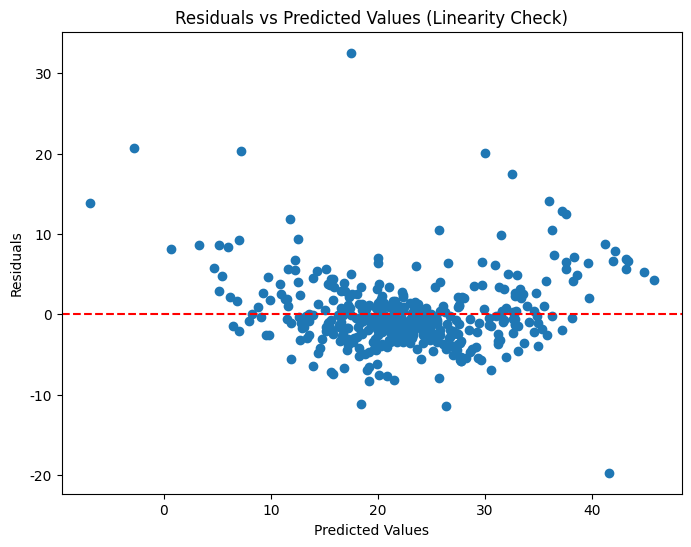

In [ ]:
# 잔차 플롯 시각화 (Residuals vs Predicted Values)

plt.figure(figsize=(8, 6))  # 그래프 크기를 가로 8인치, 세로 6인치로 설정

plt.scatter(results.fittedvalues, results.resid)  
# x축: 모델의 예측 값 (fitted values)
# y축: 잔차 값 (residuals = 실제 값 - 예측 값)

plt.axhline(y=0, color='red', linestyle='--')  
# 잔차가 0인 기준선 추가 (선형성을 확인하기 위해 사용)

plt.xlabel('Predicted Values')  # x축 라벨: 예측 값
plt.ylabel('Residuals')  # y축 라벨: 잔차
plt.title('Residuals vs Predicted Values (Linearity Check)')  
# 그래프 제목: 예측 값과 잔차 간의 관계를 통해 선형성 확인

plt.show()  # 그래프 출력

### **8) 정규성 확인**
오차항은 서로 독립이고 평균 0의 정규분포를 따른다.

<Figure size 600x600 with 0 Axes>

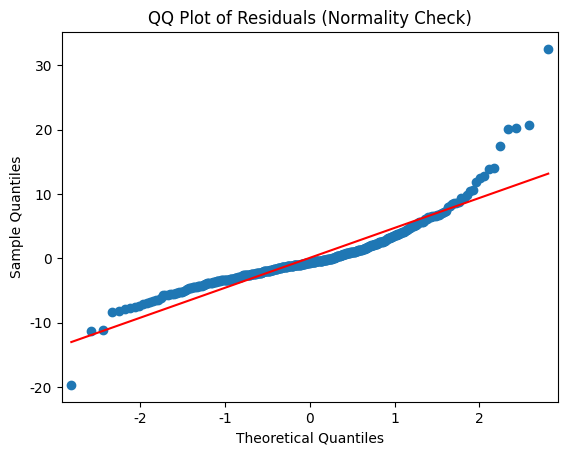

In [ ]:
# QQ 플롯 시각화 (잔차의 정규성 확인)

plt.figure(figsize=(6, 6))  # 그래프 크기를 가로 6인치, 세로 6인치로 설정

sm.qqplot(results.resid, line='s')  
# 잔차(residuals)의 정규성을 확인하기 위한 Q-Q 플롯 생성
# line='s': 잔차가 정규분포를 따를 경우 일치해야 하는 기준선 추가

plt.title('QQ Plot of Residuals (Normality Check)')  
# 그래프 제목: 잔차의 정규성 확인

plt.show()  # 그래프 출력

### **9) 등분산성 (Equal Variance)**
오차의 분산은 등분산 속성을 갖는다.

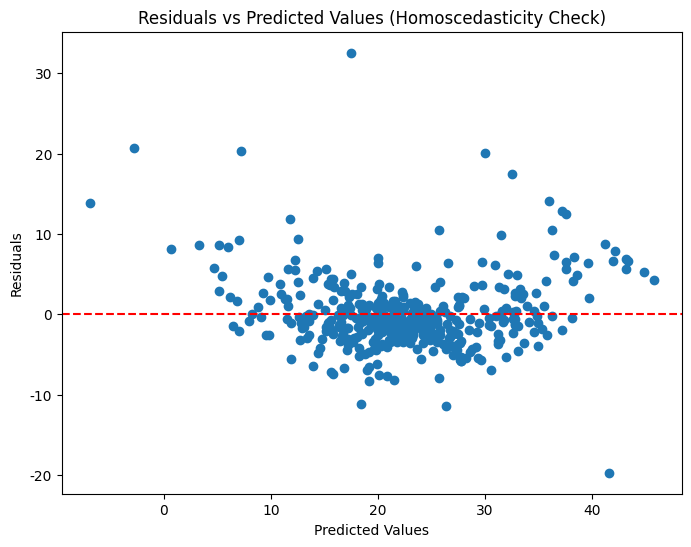

In [ ]:
# 잔차와 예측 값의 산점도 시각화 (등분산성 확인)

plt.figure(figsize=(8, 6))  # 그래프 크기를 가로 8인치, 세로 6인치로 설정

plt.scatter(results.fittedvalues, results.resid)  
# x축: 모델이 예측한 값 (fitted values)
# y축: 잔차 값 (residuals = 실제 값 - 예측 값)

plt.axhline(y=0, color='red', linestyle='--')  
# 잔차가 0인 기준선 추가 (등분산성을 확인하기 위해 사용)

plt.xlabel('Predicted Values')  # x축 라벨: 예측 값
plt.ylabel('Residuals')  # y축 라벨: 잔차
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)')  
# 그래프 제목: 잔차와 예측 값 간의 관계를 통해 등분산성 확인

plt.show()  # 그래프 출력

### **10) 독립성 (Independence)**
각 독립변수(확률변수)는 서로 독립 관계이다.

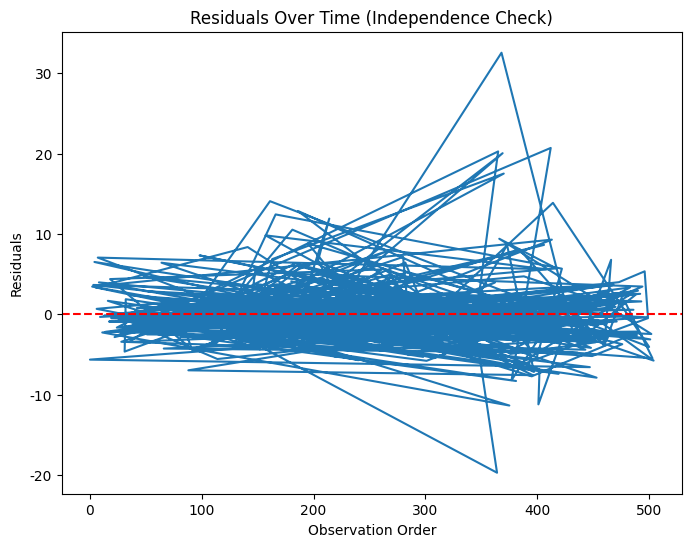

In [ ]:
# 잔차의 시간 경과에 따른 변화 시각화 (독립성 확인)

plt.figure(figsize=(8, 6))  # 그래프 크기를 가로 8인치, 세로 6인치로 설정

plt.plot(results.resid)  
# 잔차(residuals)를 관측 순서에 따라 선형 그래프로 표시

plt.axhline(y=0, color='red', linestyle='--')  
# 잔차가 0인 기준선 추가 (독립성을 확인하기 위해 사용)

plt.xlabel('Observation Order')  # x축 라벨: 관측 순서
plt.ylabel('Residuals')  # y축 라벨: 잔차
plt.title('Residuals Over Time (Independence Check)')  
# 그래프 제목: 잔차의 독립성 확인

plt.show()  # 그래프 출력

-잔차가 0을 중심으로 무작위로 분포하며, 특정한 패턴이 없어 독립성 가정을 대체로 충족함. <br><br>
-하지만 일부 극단적인 값이 관찰되므로 추가 분석이 필요할 수 있음.

#### <img src="../images/unlock.png" width="25" height="25"> <font color=gray> **퀴즈가 종료되었습니다.** </font>  

***

# **7. Regularization (정규화)** 

- **정의**
  - 학습모델의 일반화 오류를 줄여서 과적합을 방지하는 기법
<br>
<br>
- **목적**
  - 학습모델 구축 시, 𝜷의 크기를 학습하며 𝜷가 커지는 것을 방지하자.
<br>
<br>
<br>

**[변수선택 기반 정규화]** : 모델 학습 중 불필요한 변수를 자동으로 제거하거나 선택하여, 중요한 변수만 사용하는 기법

## **7-1. 전진선택법 (Forward Selection)**

In [ ]:
# 데이터 준비: 독립 변수(X)와 종속 변수(y) 정의

X = data_test.drop('MEDV', axis=1)  
# 독립 변수: 'MEDV' 열을 제외한 나머지 열을 사용

y = data_test['MEDV']  
# 종속 변수: 'MEDV' 열 (예측 대상)

In [ ]:
import matplotlib.pyplot as plt

# 전진 선택법 (Forward Selection)과 모델 성능 시각화를 포함한 함수
def forward_selection_with_visualization(X, y, significance_level=0.05):
    initial_features = []  # 모델에 추가된 변수들
    remaining_features = list(X.columns)  # 선택 가능 변수들
    selected_features = []  # 최종 선택된 변수들
    model_performance = []  # 모델 성능 추적 (예: R^2 값 저장)

    while remaining_features:
        best_pval = float("inf")  # 현재 가장 낮은 p-value 초기화
        best_feature = None  # 최적의 변수 초기화

        # 남아 있는 변수들 중 최적의 변수를 선택
        for feature in remaining_features:
            X_subset = sm.add_constant(X[initial_features + [feature]])  # 선택된 변수 + 새로운 변수
            model = sm.OLS(y, X_subset).fit()  # 모델 학습
            pval = model.pvalues[feature]  # 새 변수의 p-value 확인
            if pval < best_pval and pval < significance_level:  # 유의성 수준 비교
                best_pval = pval
                best_feature = feature

        if best_feature:  # 최적의 변수가 존재하면
            initial_features.append(best_feature)  # 선택된 변수 리스트에 추가
            remaining_features.remove(best_feature)  # 후보 변수 리스트에서 제거
            selected_features.append(best_feature)  # 최종 선택 변수에 추가

            # 현재 변수로 모델 성능 평가
            X_subset = sm.add_constant(X[initial_features])  # 현재 변수로 모델 구성
            model = sm.OLS(y, X_subset).fit()
            model_performance.append(model.rsquared)  # R^2 값을 저장
        else:
            break  # 선택 가능한 변수가 없으면 종료

    return selected_features, model_performance

# 전진 선택법 실행 및 결과 시각화
selected_features, model_performance = forward_selection_with_visualization(X, y)

print("전진 선택법 이후 선택된 변수들:", selected_features)
print("전진 선택에 따른 모델 성능:", model_performance)

# 모델 성능 시각화 (R^2 값)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(model_performance) + 1), model_performance, marker='o', linestyle='-', color='blue')
plt.title("Forward Selection: Model Performance (R²)")
plt.xlabel("Number of Selected Features")
plt.ylabel("R² Value")
plt.xticks(range(1, len(model_performance) + 1))  # x축 눈금 설정
plt.grid(True)
plt.show()

전진 선택법 이후 선택된 변수들 : ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS', 'B', 'ZN', 'CRIM', 'RAD', 'TAX']
전진 선택에 따른 모델 성능: [np.float64(0.5441462975864799), np.float64(0.6385616062603404), np.float64(0.6786241601613111), np.float64(0.6903077016842538), np.float64(0.7080892893529662), np.float64(0.7157742117396082), np.float64(0.7221614025277103), np.float64(0.726607858739603), np.float64(0.7288250904754123), np.float64(0.734176779117103), np.float64(0.7405822802569575)]


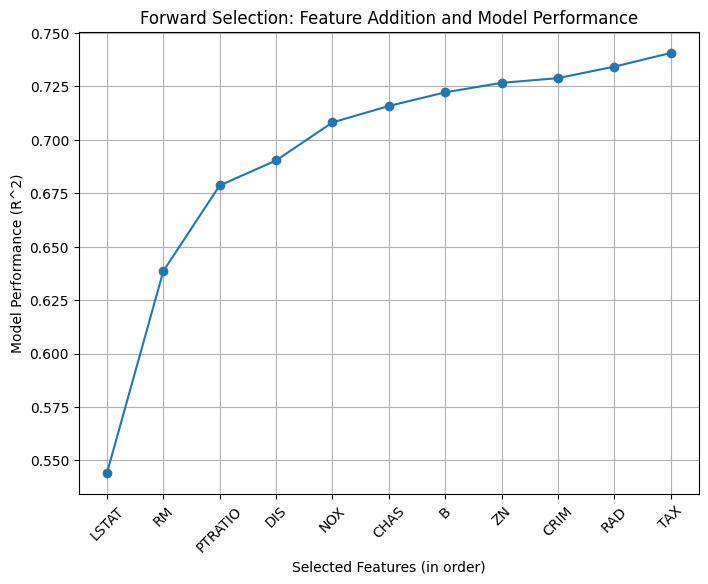

In [ ]:
# 전진 선택법 결과: 모델 성능(R^2) 시각화

plt.figure(figsize=(8, 6))  # 그래프 크기를 가로 8인치, 세로 6인치로 설정
plt.plot(range(1, len(model_performance) + 1), model_performance, 
         marker='o', linestyle='-')  
# x축: 선택된 변수의 순서
# y축: 각 단계에서의 R^2 값 (모델 성능)

plt.xticks(range(1, len(model_performance) + 1), selected_features, rotation=45)  
# x축 눈금을 선택된 변수 이름으로 설정, 각 변수를 45도 회전해 표시

plt.xlabel('Selected Features (in order)')  # x축 라벨: 선택된 변수 순서
plt.ylabel('Model Performance (R^2)')  # y축 라벨: 모델 성능 (R^2 값)
plt.title('Forward Selection: Feature Addition and Model Performance')  
# 그래프 제목: 변수 추가와 모델 성능의 관계

plt.grid()  # 그리드 추가
plt.show()  # 그래프 출력

## **7-2. 후진제거법 (Backward Elimination)**

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 후진 소거법 (Backward Elimination) 구현 및 성능 시각화 포함
def backward_elimination_with_visualization(X, y, significance_level=0.05):
    features = list(X.columns)  # 초기에는 모든 독립 변수를 포함
    model_performance = []  # 각 단계에서의 모델 성능 기록 (R²)

    while len(features) > 0:
        # 현재 선택된 변수로 회귀 모델 생성
        X_subset = sm.add_constant(X[features])  # 상수항 추가
        model = sm.OLS(y, X_subset).fit()  # OLS 회귀 모델 적합

        # 모델 성능(R²) 기록
        model_performance.append(model.rsquared)

        # 변수의 p-value 계산
        pvalues = model.pvalues[1:]  # 상수(constant)는 제외
        max_pval = pvalues.max()  # p-value 중 가장 큰 값 확인

        if max_pval > significance_level:  # 가장 큰 p-value가 유의 수준을 초과하면
            excluded_feature = pvalues.idxmax()  # 해당 변수 이름 추출
            features.remove(excluded_feature)  # 변수 제거
        else:
            break  # 모든 변수의 p-value가 유의 수준 이하일 경우 반복 종료

    return features, model_performance

# 후진 소거법 실행 및 결과 확인
selected_features_backward, model_performance_backward = backward_elimination_with_visualization(X, y)

print("후진 제거법 이후 선택된 변수들:", selected_features_backward)
print("후진 제거에 따른 모델 성능:", model_performance_backward)

# 모델 성능 시각화 (R² 값)
plt.figure(figsize=(8, 6))
plt.plot(range(len(model_performance_backward)), model_performance_backward, 
         marker='o', linestyle='-', color='blue')
plt.title("Backward Elimination: Model Performance (R²)")
plt.xlabel("Number of Remaining Features")
plt.ylabel("R² Value")
plt.grid(True)
plt.show()

후진 제거법 이후 선택된 변수들 : ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
후진 제거에 따른 모델 성능: [np.float64(0.7406426641094095), np.float64(0.7406412165505144), np.float64(0.7405822802569574)]


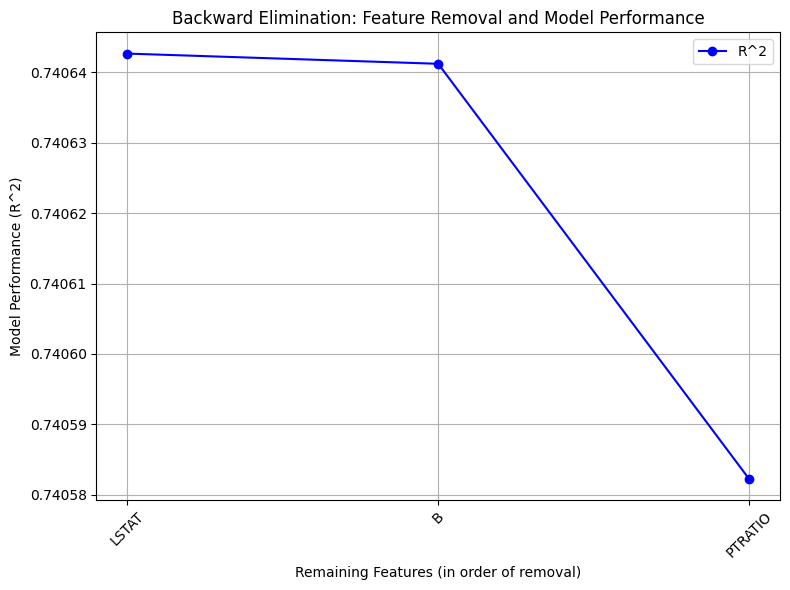

In [ ]:
# 후진 소거법 모델 성능 시각화 (R² 값)

plt.figure(figsize=(8, 6))  # 그래프 크기 설정

x_ticks = range(len(model_performance_backward))  # x축 눈금 위치 설정

# 모델 성능 그래프
plt.plot(x_ticks, model_performance_backward, marker='o', linestyle='-', color='b', label='R^2')  
# x축: 단계 번호 (변수 제거 순서)
# y축: 각 단계에서의 R² 값 (모델 성능)

# x축 레이블 설정 (남아있는 변수 이름)
adjusted_features = selected_features_backward[::-1][:len(model_performance_backward)]  
# 선택된 변수를 제거 순서대로 역순 정렬하여 x축에 표시
plt.xticks(x_ticks, adjusted_features, rotation=45)  
# x축 눈금을 남아있는 변수 이름으로 설정, 45도 회전

plt.xlabel('Remaining Features (in order of removal)')  # x축 라벨: 남아있는 변수 이름
plt.ylabel('Model Performance (R^2)')  # y축 라벨: 모델 성능 (R² 값)
plt.title('Backward Elimination: Feature Removal and Model Performance')  
# 그래프 제목: 변수 제거와 모델 성능의 관계

plt.legend()  # 범례 추가
plt.grid()  # 그리드 추가
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()  # 그래프 출력

***


#### **[Shrinkage methods]** : 학습 시 계수(𝛽)를 작게 학습하도록 유도

  1. Ridge regression: 변수 계수(𝛽) 값의 제곱 합을 제한
  \begin{equation}
  \sum_{j=1}^{p} \beta_j^2 \tag{1}
  \end{equation}

  2. Lasso regression: 변수 계수(𝛽) 값의 합을 제한
  \begin{equation}
  \sum_{j=1}^{p} |\beta_j| \tag{2}
  \end{equation}

  3. Elastic net regression: 제곱 합과 합을 모두 제한
  \begin{equation}
  \sum_{j=1}^{p} \beta_j^2 + \sum_{j=1}^{p} |\beta_j| \tag{3}
  \end{equation}

## **8-1. Ridge Regression**

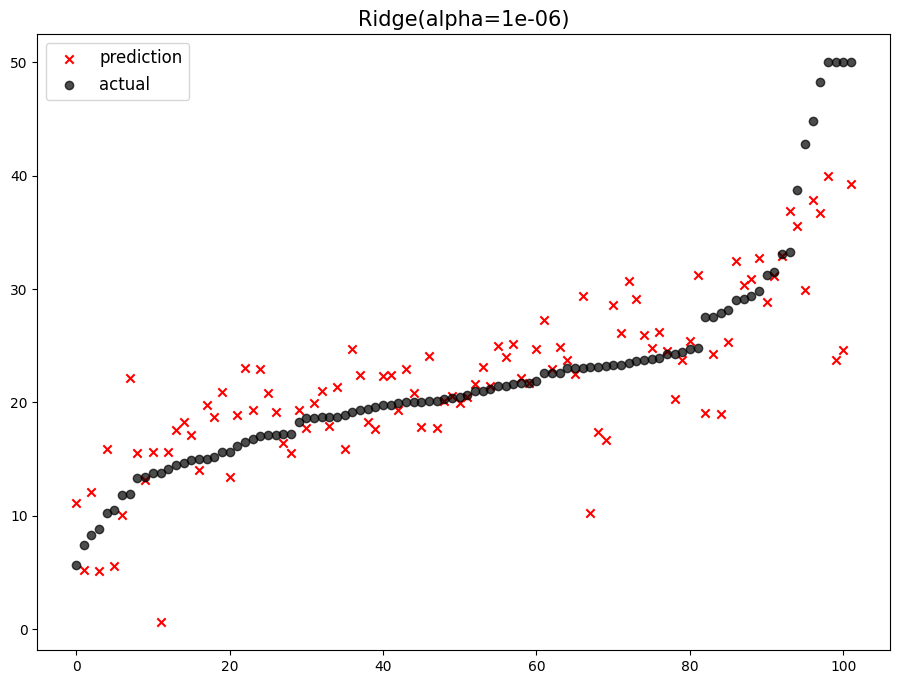

                 model        mse
0     Ridge(alpha=100)  37.512397
1      Ridge(alpha=10)  35.525132
2       Ridge(alpha=1)  34.231606
3     Ridge(alpha=0.1)  33.548488
4    Ridge(alpha=0.01)  33.459001
5   Ridge(alpha=0.001)  33.449982
6  Ridge(alpha=0.0001)  33.449080
7   Ridge(alpha=1e-06)  33.448981


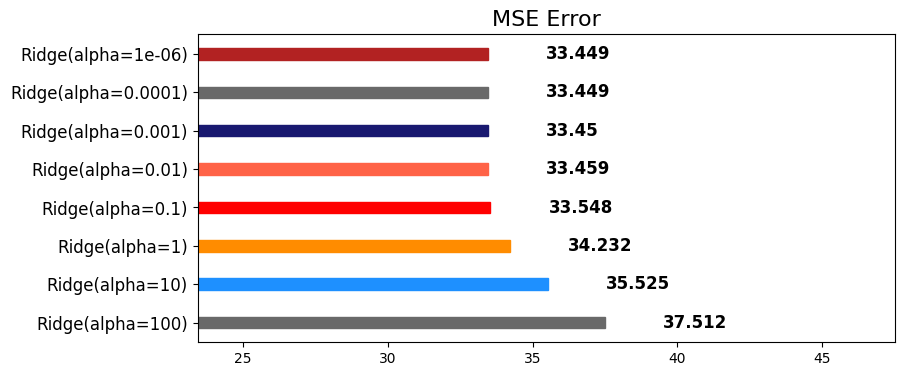

In [ ]:
from sklearn.linear_model import Ridge

# Ridge 회귀 모델 적용 (L2 정규화)
# alpha 값이 클수록 정규화 강도가 커짐 (모델의 일반화 능력 증가)
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]  # 다양한 alpha 값 설정
for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=331)  # Ridge 모델 초기화, random_state로 재현성 보장
    ridge.fit(X_train, y_train)  # 학습 데이터로 모델 훈련
    pred_ridge = ridge.predict(X_test)  # 테스트 데이터에 대한 예측
    add_model('Ridge(alpha={})'.format(alpha), pred_ridge, y_test)  
    # add_model은 사용자 정의 함수로, 모델 이름과 예측 결과를 저장

# 모든 모델의 성능 비교 그래프 출력
plot_all()  # plot_all은 사용자 정의 함수로, 다양한 모델의 성능을 시각화

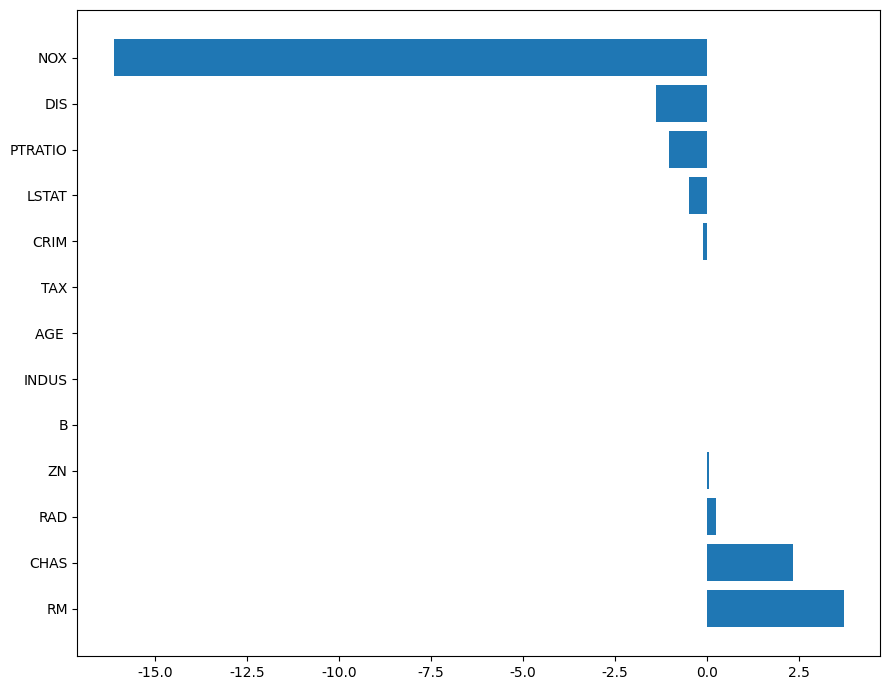

In [23]:
plot_coef(X_train.columns, ridge.coef_)

## **7-2. Lasso Regression**

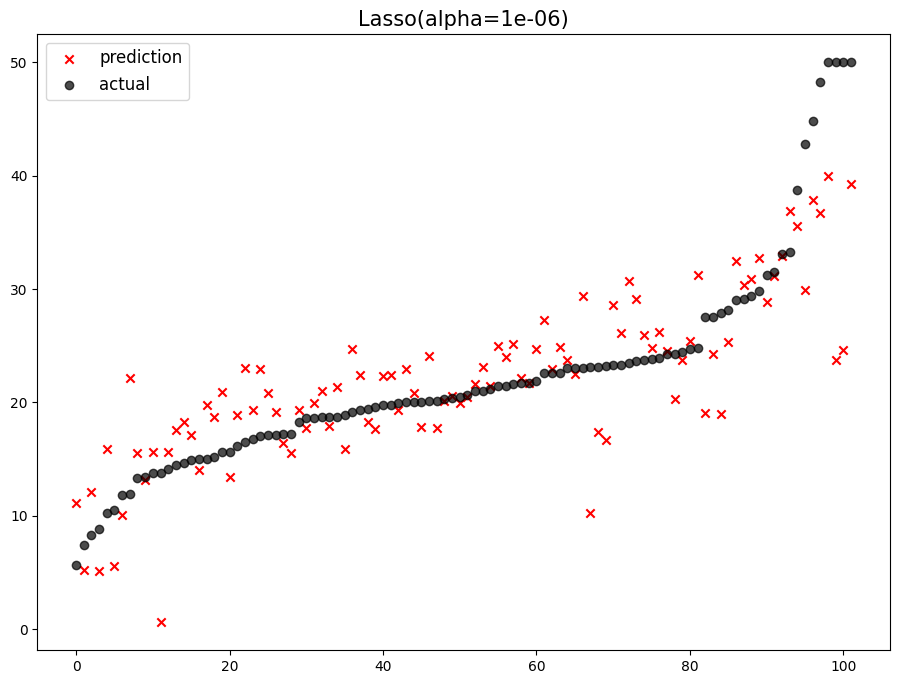

                  model        mse
0      Lasso(alpha=100)  75.806540
1       Lasso(alpha=10)  54.414927
2        Lasso(alpha=1)  41.700097
3      Ridge(alpha=100)  37.512397
4      Lasso(alpha=0.1)  36.074853
5       Ridge(alpha=10)  35.525132
6        Ridge(alpha=1)  34.231606
7     Lasso(alpha=0.01)  33.792934
8      Ridge(alpha=0.1)  33.548488
9    Lasso(alpha=0.001)  33.479018
10    Ridge(alpha=0.01)  33.459001
11  Lasso(alpha=0.0001)  33.451935
12   Ridge(alpha=0.001)  33.449982
13  Ridge(alpha=0.0001)  33.449080
14   Lasso(alpha=1e-06)  33.449009
15   Ridge(alpha=1e-06)  33.448981


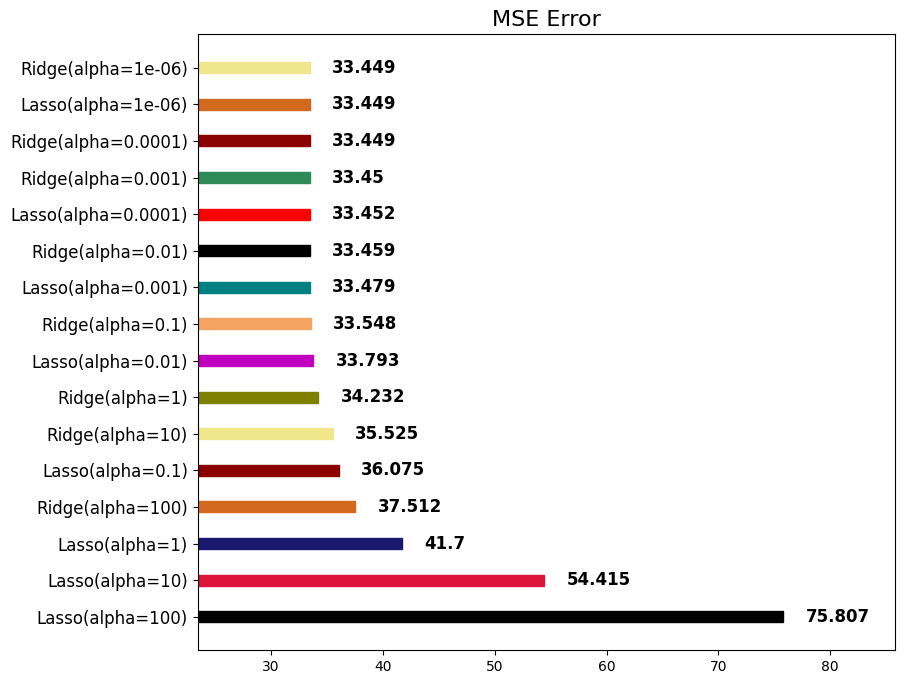

In [ ]:
from sklearn.linear_model import Lasso

# Lasso 회귀 모델 적용 (L1 정규화)
# alpha 값이 클수록 정규화 강도가 커짐 (모델의 일반화 능력 증가)
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]  # 다양한 alpha 값 설정
for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=111)  # Lasso 모델 초기화, random_state로 재현성 보장
    lasso.fit(X_train, y_train)  # 학습 데이터로 모델 훈련
    pred_lasso = lasso.predict(X_test)  # 테스트 데이터에 대한 예측
    add_model('Lasso(alpha={})'.format(alpha), pred_lasso, y_test)  
    # add_model은 사용자 정의 함수로, 모델 이름과 예측 결과를 저장

# 모든 모델의 성능 비교 그래프 출력
plot_all()  # plot_all은 사용자 정의 함수로, 다양한 모델의 성능을 시각화

## **7-3. Elasticnet Regression**

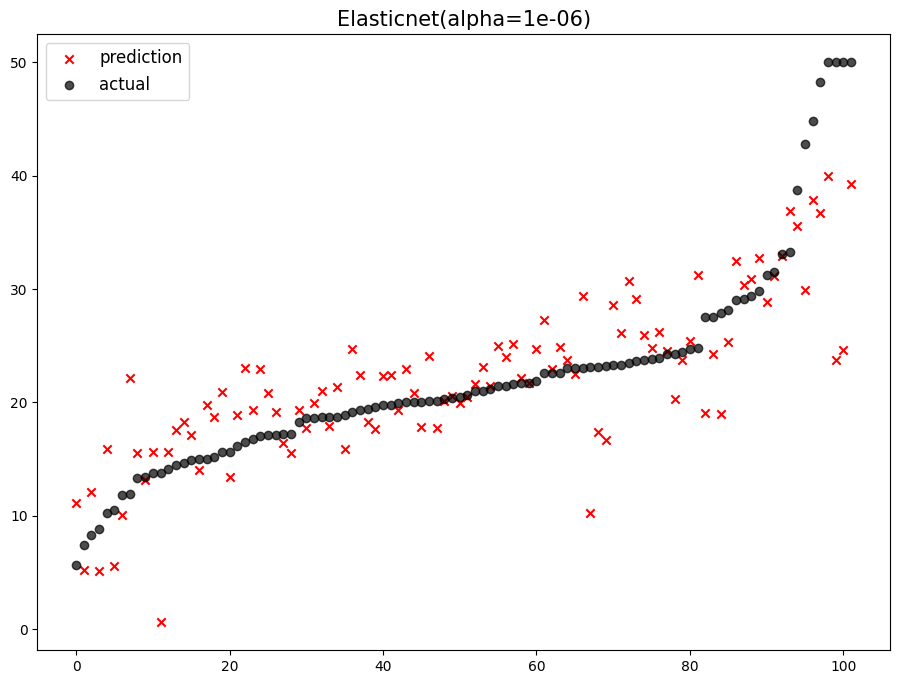

                       model        mse
0      Elasticnet(alpha=100)  75.903410
1           Lasso(alpha=100)  75.806540
2            Lasso(alpha=10)  54.414927
3       Elasticnet(alpha=10)  52.674840
4             Lasso(alpha=1)  41.700097
5        Elasticnet(alpha=1)  40.665332
6           Ridge(alpha=100)  37.512397
7      Elasticnet(alpha=0.1)  36.264654
8           Lasso(alpha=0.1)  36.074853
9            Ridge(alpha=10)  35.525132
10    Elasticnet(alpha=0.01)  34.769967
11            Ridge(alpha=1)  34.231606
12         Lasso(alpha=0.01)  33.792934
13   Elasticnet(alpha=0.001)  33.662437
14          Ridge(alpha=0.1)  33.548488
15        Lasso(alpha=0.001)  33.479018
16  Elasticnet(alpha=0.0001)  33.470712
17         Ridge(alpha=0.01)  33.459001
18       Lasso(alpha=0.0001)  33.451935
19        Ridge(alpha=0.001)  33.449982
20   Elasticnet(alpha=1e-06)  33.449197
21       Ridge(alpha=0.0001)  33.449080
22        Lasso(alpha=1e-06)  33.449009
23        Ridge(alpha=1e-06)  33.448981


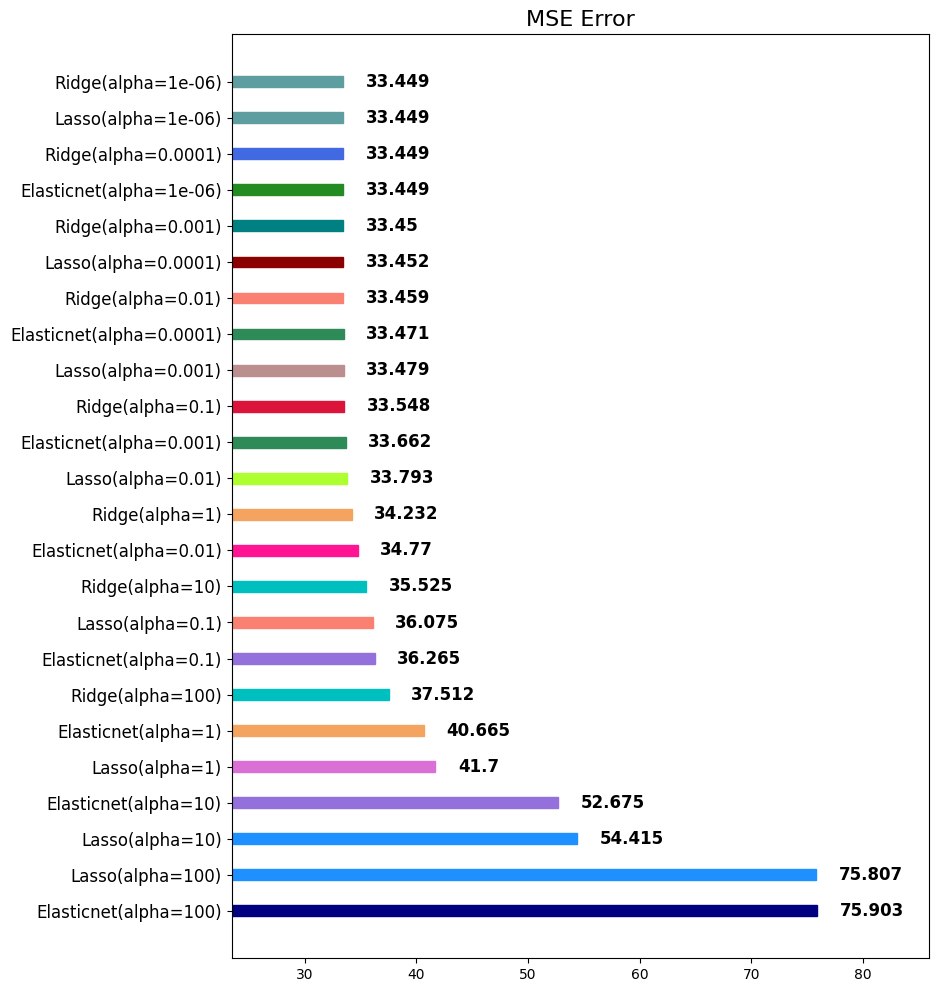

In [ ]:
from sklearn.linear_model import ElasticNet

# ElasticNet 회귀 모델 적용 (L1 + L2 정규화)
# alpha 값이 클수록 정규화 강도가 커짐 (모델의 일반화 능력 증가)
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]  # 다양한 alpha 값 설정
for alpha in alphas:
    Elasticnet = ElasticNet(alpha=alpha, random_state=111)  # ElasticNet 모델 초기화
    Elasticnet.fit(X_train, y_train)  # 학습 데이터로 모델 훈련
    pred_elastic = Elasticnet.predict(X_test)  # 테스트 데이터에 대한 예측
    add_model('Elasticnet(alpha={})'.format(alpha), pred_elastic, y_test)  

# 모든 모델의 성능 비교 그래프 출력
plot_all()  

## **7-4. Ridge vs Lasso vs Elasticnet Regression**

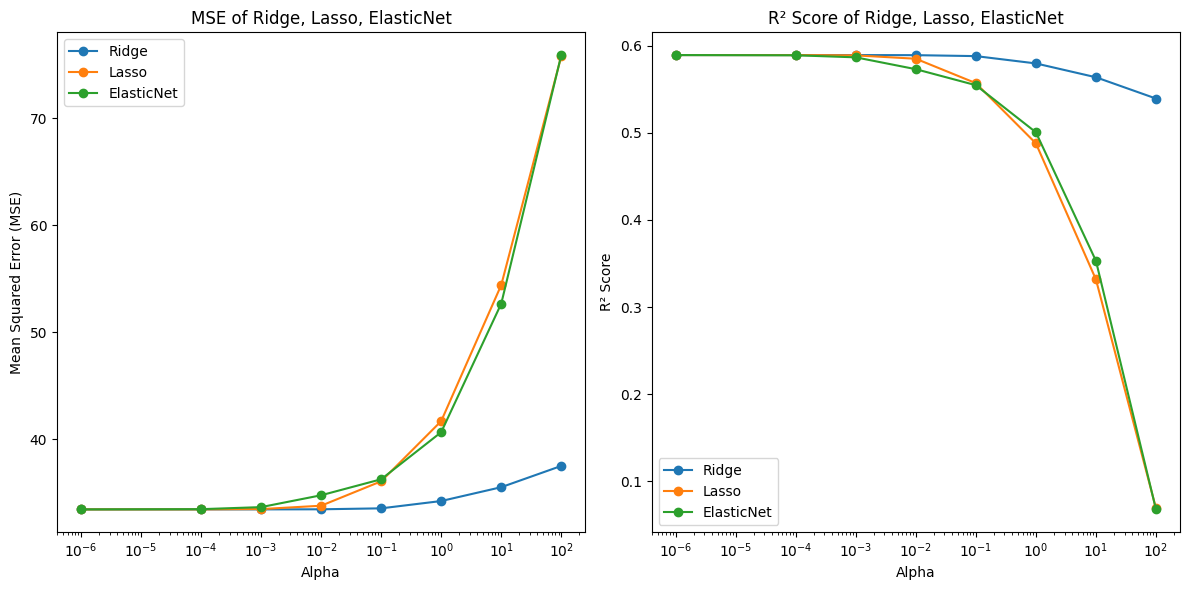

In [ ]:
# 세 모델의 결과를 저장할 리스트 초기화
ridge_results = []  # Ridge 모델 결과 저장
lasso_results = []  # Lasso 모델 결과 저장
elasticnet_results = []  # ElasticNet 모델 결과 저장

# Ridge 모델 평가
for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=331)  # Ridge 모델 초기화
    ridge.fit(X_train, y_train)  # 모델 학습
    pred_ridge = ridge.predict(X_test)  # 예측값 생성
    mse_ridge = mean_squared_error(y_test, pred_ridge)  # MSE 계산
    r2_ridge = r2_score(y_test, pred_ridge)  # R² 계산
    ridge_results.append((alpha, mse_ridge, r2_ridge))  # 결과 저장

# Lasso 모델 평가
for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=111)  # Lasso 모델 초기화
    lasso.fit(X_train, y_train)  # 모델 학습
    pred_lasso = lasso.predict(X_test)  # 예측값 생성
    mse_lasso = mean_squared_error(y_test, pred_lasso)  # MSE 계산
    r2_lasso = r2_score(y_test, pred_lasso)  # R² 계산
    lasso_results.append((alpha, mse_lasso, r2_lasso))  # 결과 저장

# ElasticNet 모델 평가
for alpha in alphas:
    elasticnet = ElasticNet(alpha=alpha, random_state=111)  # ElasticNet 모델 초기화
    elasticnet.fit(X_train, y_train)  # 모델 학습
    pred_elastic = elasticnet.predict(X_test)  # 예측값 생성
    mse_elastic = mean_squared_error(y_test, pred_elastic)  # MSE 계산
    r2_elastic = r2_score(y_test, pred_elastic)  # R² 계산
    elasticnet_results.append((alpha, mse_elastic, r2_elastic))  # 결과 저장

# 그래프 그리기
plt.figure(figsize=(12, 6))

# MSE 시각화
plt.subplot(1, 2, 1)
plt.plot(alphas, [x[1] for x in ridge_results], label='Ridge', marker='o')  # Ridge MSE
plt.plot(alphas, [x[1] for x in lasso_results], label='Lasso', marker='o')  # Lasso MSE
plt.plot(alphas, [x[1] for x in elasticnet_results], label='ElasticNet', marker='o')  # ElasticNet MSE
plt.xscale('log')  # x축을 로그 스케일로 설정
plt.xlabel('Alpha')  # x축 라벨
plt.ylabel('Mean Squared Error (MSE)')  # y축 라벨
plt.title('MSE of Ridge, Lasso, ElasticNet')  # 그래프 제목
plt.legend()  # 범례

# R² 시각화
plt.subplot(1, 2, 2)
plt.plot(alphas, [x[2] for x in ridge_results], label='Ridge', marker='o')  # Ridge R²
plt.plot(alphas, [x[2] for x in lasso_results], label='Lasso', marker='o')  # Lasso R²
plt.plot(alphas, [x[2] for x in elasticnet_results], label='ElasticNet', marker='o')  # ElasticNet R²
plt.xscale('log')  # x축을 로그 스케일로 설정
plt.xlabel('Alpha')  # x축 라벨
plt.ylabel('R² Score')  # y축 라벨
plt.title('R² Score of Ridge, Lasso, ElasticNet')  # 그래프 제목
plt.legend()  # 범례

plt.tight_layout()  # 그래프 간 간격 조정
plt.show()  # 그래프 출력

# <img src="../images/emergency.png" width="40" height="40"> **코드 실습 시간 - 정규화** 

## **1) Ridge Regression**

In [ ]:
# 데이터 로드 및 중복 제거

# 와인 품질 데이터 로드
data_wine = pd.read_csv('../data/winequality-red.csv')

# 중복된 행의 개수 확인
data_wine.duplicated().sum()

# 중복 제거
clean_wine = data_wine.copy()  # 원본 데이터를 유지하기 위해 복사
clean_wine.drop_duplicates(subset=None, inplace=True)  # 중복된 행 제거

# 독립 변수(X)와 종속 변수(y) 정의
X_wine = clean_wine.drop('quality', axis=1)  # 'quality' 열을 제외한 나머지 열을 독립 변수로 사용
y_wine = clean_wine['quality']  # 'quality' 열을 종속 변수로 사용

# 학습 데이터와 테스트 데이터로 분리 (80:20 비율)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=0
)
# test_size=0.2: 데이터의 20%를 테스트 세트로 사용
# random_state=0: 결과 재현성을 위해 시드 설정

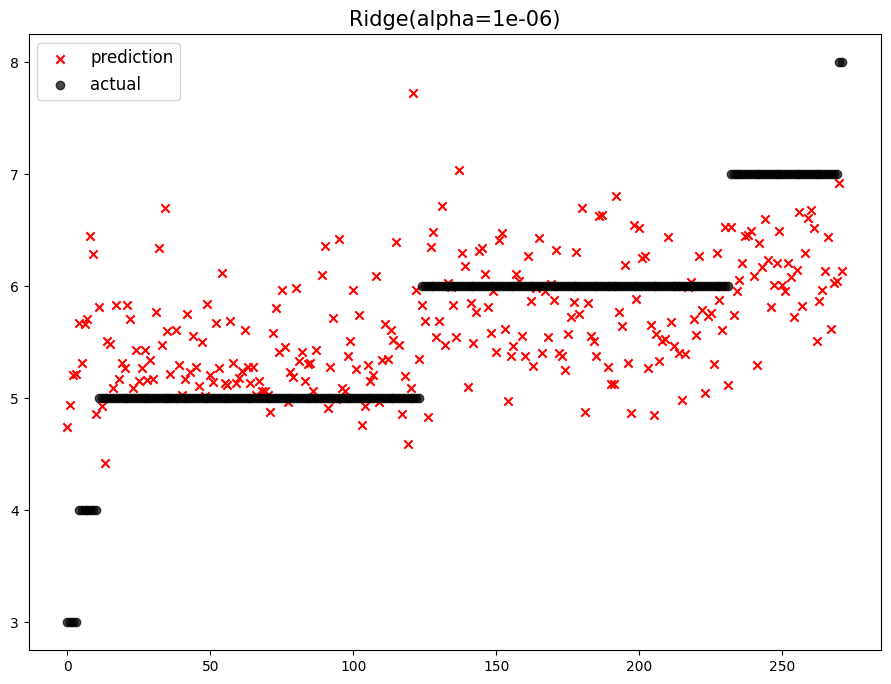

                       model        mse
0      Elasticnet(alpha=100)  75.903410
1           Lasso(alpha=100)  75.806540
2            Lasso(alpha=10)  54.414927
3       Elasticnet(alpha=10)  52.674840
4             Lasso(alpha=1)  41.700097
5        Elasticnet(alpha=1)  40.665332
6      Elasticnet(alpha=0.1)  36.264654
7           Lasso(alpha=0.1)  36.074853
8     Elasticnet(alpha=0.01)  34.769967
9          Lasso(alpha=0.01)  33.792934
10   Elasticnet(alpha=0.001)  33.662437
11        Lasso(alpha=0.001)  33.479018
12  Elasticnet(alpha=0.0001)  33.470712
13       Lasso(alpha=0.0001)  33.451935
14   Elasticnet(alpha=1e-06)  33.449197
15        Lasso(alpha=1e-06)  33.449009
16          Ridge(alpha=100)   0.579898
17           Ridge(alpha=10)   0.542719
18        Ridge(alpha=1e-06)   0.536892
19       Ridge(alpha=0.0001)   0.536692
20            Ridge(alpha=1)   0.536264
21        Ridge(alpha=0.001)   0.536112
22         Ridge(alpha=0.01)   0.535807
23          Ridge(alpha=0.1)   0.535762


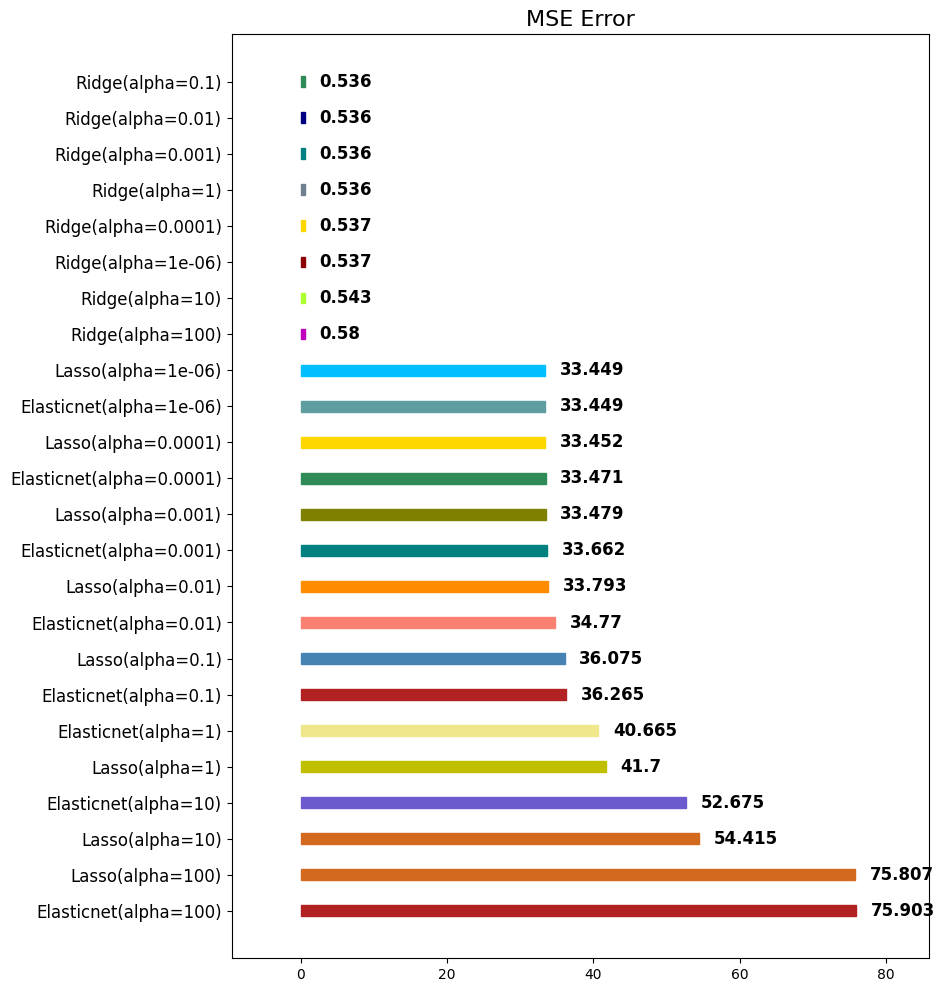

In [ ]:
from sklearn.linear_model import Ridge

# Ridge 회귀 모델 평가 (L2 정규화)

# 다양한 alpha 값 설정 (정규화 강도)
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]

# 각 alpha 값에 대해 Ridge 모델 평가
for alpha in alphas:
    ridge_test = Ridge(alpha=alpha, random_state=331)  # Ridge 모델 초기화
    ridge_test.fit(X_train_wine, y_train_wine)  # 학습 데이터로 모델 학습
    pred_ridge_test = ridge_test.predict(X_test_wine)  # 테스트 데이터에 대한 예측
    add_model2('Ridge(alpha={})'.format(alpha), pred_ridge_test, y_test_wine)  

plot_all2() 

## **2) Lasso Regression**

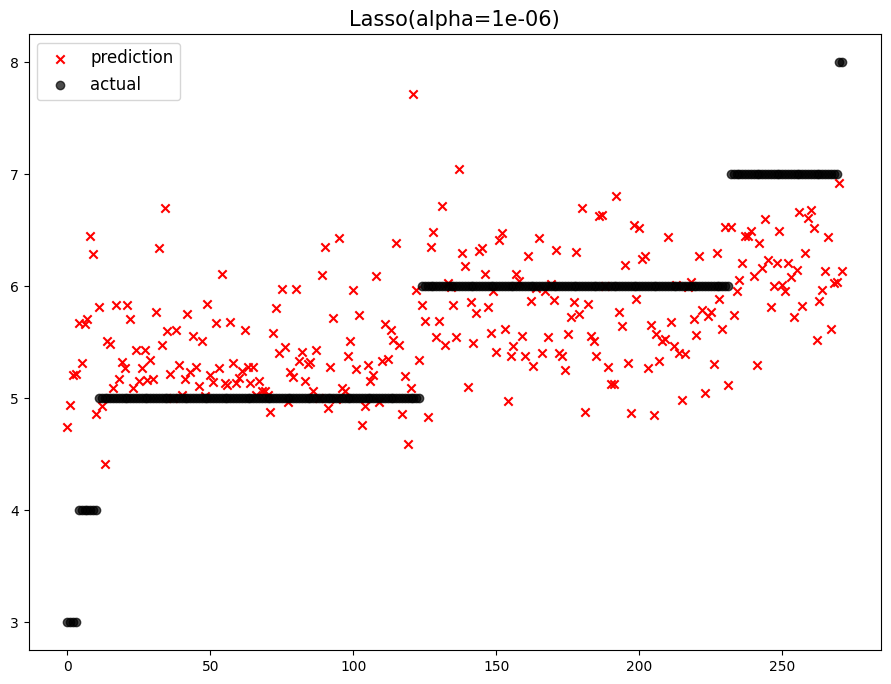

                       model        mse
0      Elasticnet(alpha=100)  75.903410
1       Elasticnet(alpha=10)  52.674840
2        Elasticnet(alpha=1)  40.665332
3      Elasticnet(alpha=0.1)  36.264654
4     Elasticnet(alpha=0.01)  34.769967
5    Elasticnet(alpha=0.001)  33.662437
6   Elasticnet(alpha=0.0001)  33.470712
7    Elasticnet(alpha=1e-06)  33.449197
8             Lasso(alpha=1)   0.717310
9           Lasso(alpha=100)   0.693310
10           Lasso(alpha=10)   0.693310
11          Lasso(alpha=0.1)   0.613420
12          Ridge(alpha=100)   0.579898
13         Lasso(alpha=0.01)   0.543669
14           Ridge(alpha=10)   0.542719
15        Ridge(alpha=1e-06)   0.536892
16        Lasso(alpha=1e-06)   0.536756
17       Ridge(alpha=0.0001)   0.536692
18            Ridge(alpha=1)   0.536264
19        Ridge(alpha=0.001)   0.536112
20         Ridge(alpha=0.01)   0.535807
21          Ridge(alpha=0.1)   0.535762
22       Lasso(alpha=0.0001)   0.535448
23        Lasso(alpha=0.001)   0.533793


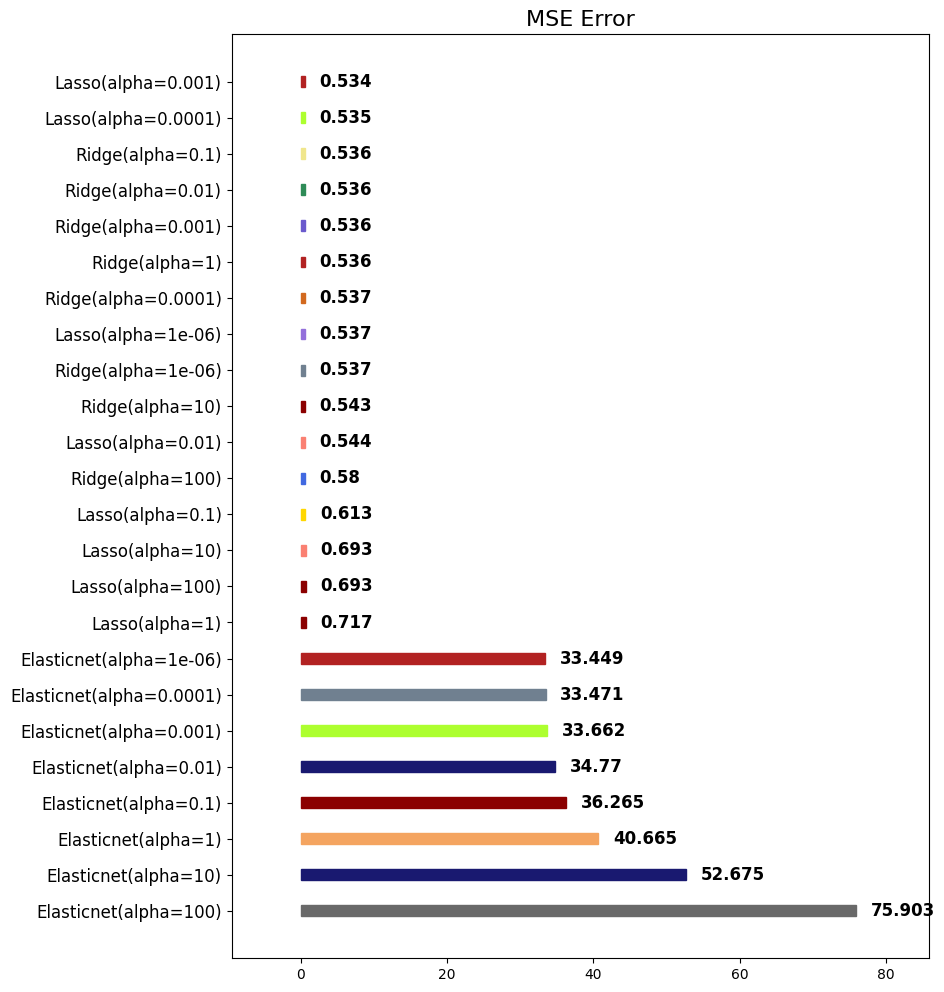

In [ ]:
from sklearn.linear_model import Lasso

# Lasso 회귀 모델 평가 (L1 정규화)

# 다양한 alpha 값 설정 (정규화 강도)
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]

# 각 alpha 값에 대해 Lasso 모델 평가
for alpha in alphas:
    lasso_test = Lasso(alpha=alpha, random_state=111)  # Lasso 모델 초기화
    lasso_test.fit(X_train_wine, y_train_wine)  # 학습 데이터로 모델 학습
    pred_lasso_test = lasso_test.predict(X_test_wine)  # 테스트 데이터에 대한 예측
    add_model2('Lasso(alpha={})'.format(alpha), pred_lasso_test, y_test_wine)  

plot_all2()  

## **3) Elasticnet Regression**

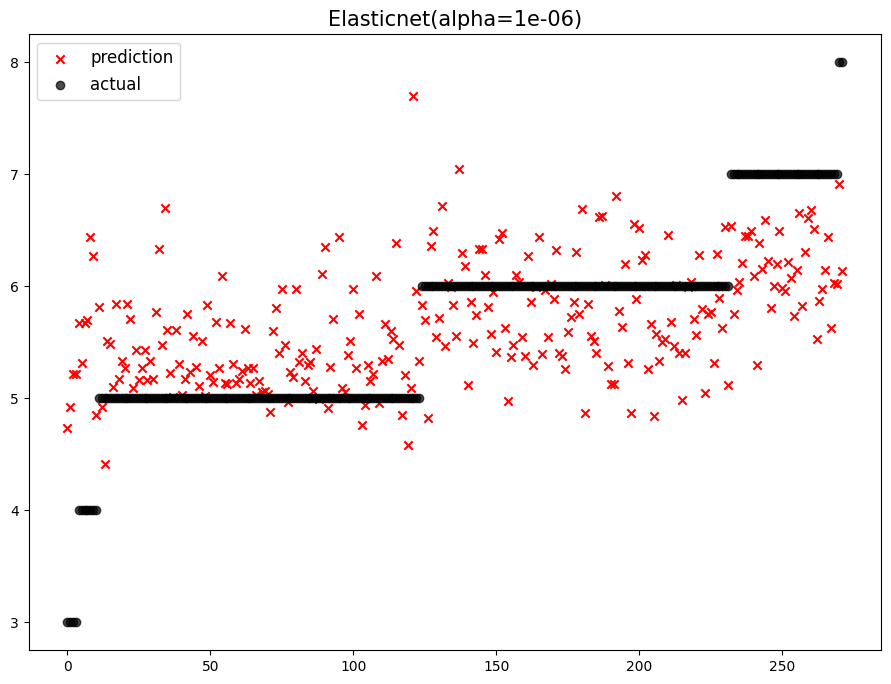

                       model       mse
0        Elasticnet(alpha=1)  0.723298
1             Lasso(alpha=1)  0.717310
2           Lasso(alpha=100)  0.693310
3            Lasso(alpha=10)  0.693310
4      Elasticnet(alpha=100)  0.693310
5       Elasticnet(alpha=10)  0.692950
6           Lasso(alpha=0.1)  0.613420
7      Elasticnet(alpha=0.1)  0.611283
8           Ridge(alpha=100)  0.579898
9          Lasso(alpha=0.01)  0.543669
10    Elasticnet(alpha=0.01)  0.543369
11           Ridge(alpha=10)  0.542719
12        Ridge(alpha=1e-06)  0.536892
13        Lasso(alpha=1e-06)  0.536756
14       Ridge(alpha=0.0001)  0.536692
15            Ridge(alpha=1)  0.536264
16   Elasticnet(alpha=1e-06)  0.536246
17        Ridge(alpha=0.001)  0.536112
18         Ridge(alpha=0.01)  0.535807
19          Ridge(alpha=0.1)  0.535762
20  Elasticnet(alpha=0.0001)  0.535603
21       Lasso(alpha=0.0001)  0.535448
22   Elasticnet(alpha=0.001)  0.535105
23        Lasso(alpha=0.001)  0.533793


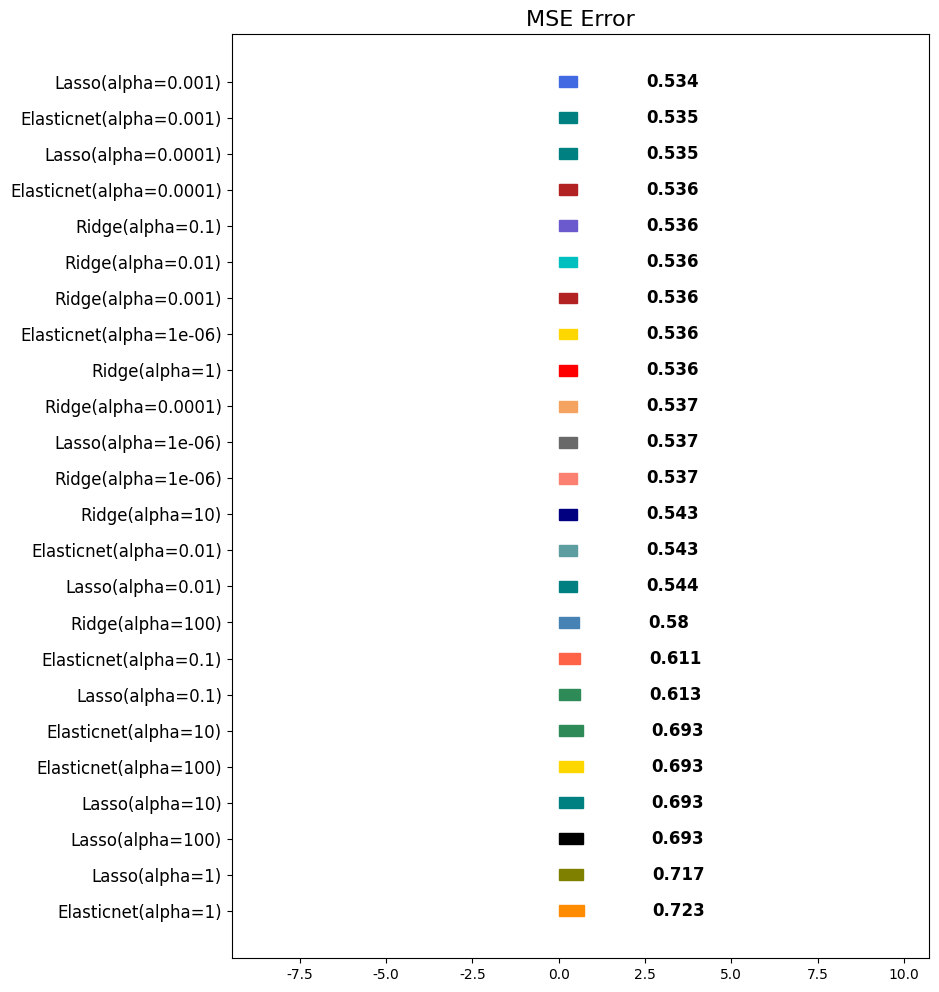

In [ ]:
from sklearn.linear_model import ElasticNet

# ElasticNet 회귀 모델 평가 (L1 + L2 정규화)

# 다양한 alpha 값 설정 (정규화 강도)
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]

# 각 alpha 값에 대해 ElasticNet 모델 평가
for alpha in alphas:
    Elasticnet_test = ElasticNet(alpha=alpha, random_state=111)  # ElasticNet 모델 초기화
    Elasticnet_test.fit(X_train_wine, y_train_wine)  # 학습 데이터로 모델 학습
    pred_elastic_test = Elasticnet_test.predict(X_test_wine)  # 테스트 데이터에 대한 예측
    add_model2('Elasticnet(alpha={})'.format(alpha), pred_elastic_test, y_test_wine)  

plot_all2() 
